In [1]:
import pandas as pd 
import numpy as np 
import matplotlib.pyplot as plt 
from matplotlib import colormaps
import matplotlib as mpl
import os
import glob 
from copy import deepcopy

In [2]:
indir = '/data/rahynema/ttHH_h5/'

# inputs = { 
#     "ttHH_dilep": "MGPy8EG_A14NNPDF23LO_ttHH_dilep", 
#     "ttHH_fullhad": "MGPy8EG_A14NNPDF23LO_ttHH_fullhad", 
#     "ttHH_semilep": "MGPy8EG_A14NNPDF23LO_ttHH_semilep", 
#     "ttbb": "PhPy8_A14_NNPDF31_ttbb_4FS_bzd5_dilep_shower", 
#     "ttbar_allhad": "PhPy8EG_A14_ttbar_hdamp258p75_allhad", 
#     "ttbar_dilep": "PhPy8EG_A14_ttbar_hdamp258p75_dil",
#     "ttbar_nonallhad": "PhPy8EG_A14_ttbar_hdamp258p75_nonallhad",
#     "QCD_JZ3": "Pythia8EvtGen_A14NNPDF23LO_jetjet_JZ3WithSW",
#     "QCD_JZ4": "Pythia8EvtGen_A14NNPDF23LO_jetjet_JZ4WithSW",
#     "QCD_JZ5": "Pythia8EvtGen_A14NNPDF23LO_jetjet_JZ5WithSW",
#     "QCD_JZ6": "Pythia8EvtGen_A14NNPDF23LO_jetjet_JZ6WithSW",
#     "QCD_JZ7": "Pythia8EvtGen_A14NNPDF23LO_jetjet_JZ7WithSW",
#     "QCD_JZ8": "Pythia8EvtGen_A14NNPDF23LO_jetjet_JZ8WithSW",
#     "QCD_JZ9": "Pythia8EvtGen_A14NNPDF23LO_jetjet_JZ9WithSW",
#     "QCD_JZ10": "Pythia8EvtGen_A14NNPDF23LO_jetjet_JZ10WithSW",
#     "QCD_JZ11": "Pythia8EvtGen_A14NNPDF23LO_jetjet_JZ11WithSW",
# }

inputs = { 
    "ttHH": ["MGPy8EG_A14NNPDF23LO_ttHH_dilep", 
                "MGPy8EG_A14NNPDF23LO_ttHH_fullhad", 
                "MGPy8EG_A14NNPDF23LO_ttHH_semilep"] , 
    "ttbar": [#"PhPy8_A14_NNPDF31_ttbb_4FS_bzd5_dilep_shower", 
                  "PhPy8EG_A14_ttbar_hdamp258p75_allhad", 
                  "PhPy8EG_A14_ttbar_hdamp258p75_dil", 
                  "PhPy8EG_A14_ttbar_hdamp258p75_nonallhad" ],
    "QCD muleijet": ["Pythia8EvtGen_A14NNPDF23LO_jetjet_JZ3WithSW", 
                     "Pythia8EvtGen_A14NNPDF23LO_jetjet_JZ4WithSW",
                     "Pythia8EvtGen_A14NNPDF23LO_jetjet_JZ5WithSW",
                     "Pythia8EvtGen_A14NNPDF23LO_jetjet_JZ6WithSW",
                     "Pythia8EvtGen_A14NNPDF23LO_jetjet_JZ7WithSW",
                     "Pythia8EvtGen_A14NNPDF23LO_jetjet_JZ8WithSW"]
                     #"Pythia8EvtGen_A14NNPDF23LO_jetjet_JZ9WithSW",
                     #"Pythia8EvtGen_A14NNPDF23LO_jetjet_JZ10WithSW",
                     #"Pythia8EvtGen_A14NNPDF23LO_jetjet_JZ11WithSW"],
}

In [3]:
#tempdf = pd.read_hdf( '/data/rahynema/ttHH_h5/MGPy8EG_A14NNPDF23LO_ttHH_dilep_mc23d_Nominal.h5')

In [10]:
indfs = {} 
mcs = ['mc20a','mc20d','mc20e']

# for samp in inputs.keys(): 
#     for mctag in mcs: 
#         fname = f'{indir}{inputs[samp]}_{mctag}_Nominal.h5' 
#         if( not os.path.exists(fname) ): 
#             print(f'WARNING! Did not find file {fname} (skipping)')
#             continue
#         else: print( f'Reading in file {fname}' )
#         tempdf = pd.read_hdf( fname )
#         if( samp in indfs.keys() ): 
#             indfs[samp] = pd.concat([indfs[samp], tempdf], ignore_index=True)
#         else: 
#             indfs[samp] = tempdf 

for samp in inputs.keys(): 
    for subsamp in inputs[samp]:
        fileglob = glob.glob(f'{indir}{subsamp}*_Nominal.h5')
        #print(fileglob)
        if( 'mc23' in subsamp ): continue 
        print(f' == Sample: {subsamp} == ')
        for fname in fileglob: 
            if( 'mc23' in fname ): continue 
            if( not os.path.exists(fname) ): 
                print(f'WARNING! Did not find file {fname} (skipping)')
                continue
            else: print( f' --> Reading in file {fname}' )
            tempdf = pd.read_hdf( fname )
            #for key in tempdf.keys(): print(key)
            # apply filtering to require >=3 LRJs to slim 
            tempdf = tempdf[ tempdf[ 'nLargeRJets' ] >= 3 ]
            if( samp in indfs.keys() ): 
                indfs[samp] = pd.concat([indfs[samp], tempdf], ignore_index=True)
            else: 
                indfs[samp] = tempdf
                
        # for mctag in mcs: 
        #     fname = f'{indir}{subsamp}_{mctag}_Nominal.h5' 
        #     if( not os.path.exists(fname) ): 
        #         print(f'WARNING! Did not find file {fname} (skipping)')
        #         continue
        #     else: print( f'Reading in file {fname}' )
        #     tempdf = pd.read_hdf( fname )
        #     if( samp in indfs.keys() ): 
        #         indfs[samp] = pd.concat([indfs[samp], tempdf], ignore_index=True)
        #     else: 
        #         indfs[samp] = tempdf 

 == Sample: MGPy8EG_A14NNPDF23LO_ttHH_dilep == 
 == Sample: MGPy8EG_A14NNPDF23LO_ttHH_fullhad == 
 --> Reading in file /data/rahynema/ttHH_h5/MGPy8EG_A14NNPDF23LO_ttHH_fullhad_mc20e_Nominal.h5
 --> Reading in file /data/rahynema/ttHH_h5/MGPy8EG_A14NNPDF23LO_ttHH_fullhad_mc20a_Nominal.h5
 --> Reading in file /data/rahynema/ttHH_h5/MGPy8EG_A14NNPDF23LO_ttHH_fullhad_mc20d_Nominal.h5
 == Sample: MGPy8EG_A14NNPDF23LO_ttHH_semilep == 
 --> Reading in file /data/rahynema/ttHH_h5/MGPy8EG_A14NNPDF23LO_ttHH_semilep_mc20e_Nominal.h5
 --> Reading in file /data/rahynema/ttHH_h5/MGPy8EG_A14NNPDF23LO_ttHH_semilep_mc20d_Nominal.h5
 --> Reading in file /data/rahynema/ttHH_h5/MGPy8EG_A14NNPDF23LO_ttHH_semilep_mc20a_Nominal.h5
 == Sample: PhPy8EG_A14_ttbar_hdamp258p75_allhad == 
 == Sample: PhPy8EG_A14_ttbar_hdamp258p75_dil == 
 --> Reading in file /data/rahynema/ttHH_h5/PhPy8EG_A14_ttbar_hdamp258p75_dil_mc20a_Nominal.h5
 --> Reading in file /data/rahynema/ttHH_h5/PhPy8EG_A14_ttbar_hdamp258p75_dil_mc20e_

In [78]:
# for key in indfs['ttHH'].keys(): 
#     if( 'Large' in key ): 
#         print(key)

In [11]:
indfs.keys()

dict_keys(['ttHH', 'ttbar', 'QCD muleijet'])

In [19]:
for k in indfs['ttHH'].keys(): 
    if( 'truth' in k ): print(k)

In [20]:
for k in indfs['ttHH'].keys(): 
    #if( 'LargeRJet1' in k ): 
        print(k)

trigPassed_HLT_2j330_a10t_lcw_jes_35smcINF_L1J100
trigPassed_HLT_e140_lhloose_nod0
trigPassed_HLT_e26_lhtight_nod0_ivarloose
trigPassed_HLT_e60_lhmedium_nod0
trigPassed_HLT_j390_a10t_lcw_jes_30smcINF_L1J100
trigPassed_HLT_j420_a10t_lcw_jes_35smcINF_L1J100
trigPassed_HLT_j420_a10t_lcw_jes_35smcINF_L1SC111
trigPassed_HLT_j460_a10_lcw_subjes_L1J100
trigPassed_HLT_j460_a10_lcw_subjes_L1SC111
trigPassed_HLT_j460_a10r_L1J100
trigPassed_HLT_j460_a10r_L1SC111
trigPassed_HLT_j460_a10t_lcw_jes_L1J100
trigPassed_HLT_j460_a10t_lcw_jes_L1SC111
trigPassed_HLT_mu26_ivarmedium
trigPassed_HLT_mu50
dataTakingYear
mc_sf
nBJets77
nBJets85
nElectrons
nMuons
nHbbLRJets
nTopLRJets
nLargeRJets
nJets
met_met_NOSYS
met_phi_NOSYS
met_sumet_NOSYS
ttHH_Lepton_pt_NOSYS
ttHH_Lepton_eta_NOSYS
ttHH_Lepton_phi_NOSYS
ttHH_Lepton_E_NOSYS
ttHH_Lepton_charge_NOSYS
ttHH_Lepton_pdgid_NOSYS
ttHH_Lepton_effSF_NOSYS
ttHH_Jet1_pt_NOSYS
ttHH_Jet1_eta_NOSYS
ttHH_Jet1_phi_NOSYS
ttHH_Jet1_E_NOSYS
ttHH_Jet1_pcbt_NOSYS
ttHH_Jet2_pt_NO

In [82]:
colors = { 'ttHH':'k', 'ttbar':'orange' , 'QCD muleijet':'green' }

# colors for different cttHH 
cnorm = mpl.colors.Normalize(vmin=-3, vmax=3)
cnorm_narrow = mpl.colors.Normalize(vmin=-1, vmax=1)

eftcolors = [ 
    colormaps['coolwarm'](cnorm(eftw))
    if (eftw!=0) else 'k'
    for eftw in np.linspace(-3,3,13) ]

In [14]:
def getEFTweightstring(eftw): 
    return str(eftw).replace('.','p').replace('-','min').replace('p0','')

GeV = 1000.

KeyError: 'ttHH_LargeRJet1_pt_NOSYS'

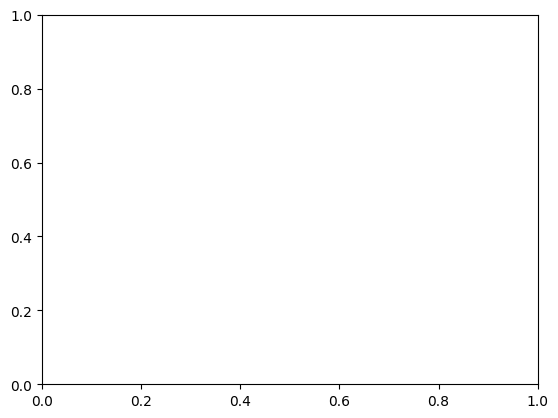

In [12]:
### plot some useful variables 

vars = { 
    'ttHH_LargeRJet1_pt_NOSYS':{ 
        'bins':np.linspace(400000,1500000,50) , 
        'xlabel':'Leading Jet pT [MeV]' } ,
    'ttHH_LargeRJet2_pt_NOSYS':{ 
        'bins':np.linspace(200000,1500000,50) , 
        'xlabel':'Subeading Jet pT [MeV]' } ,
    'ttHH_LargeRJet1_GN2Xv01_Dtop_NOSYS':{
        'bins':np.linspace(-10,10,50) ,
        'xlabel':'Leading Jet GN2Xv01 Dtop Score' } ,
    'ttHH_LargeRJet1_tag_NOSYS':{
        'bins':np.linspace(0,2,3) ,
        'xlabel':'Leading Jet GN2Xv01 FlatMassQCDEff 0.94% Pass' } , 
    'ttHH_LargeRJet2_GN2Xv01_Dtop_NOSYS':{
        'bins':np.linspace(-10,10,50) ,
        'xlabel':'Subleading Jet GN2Xv01 Dtop Score' } ,
    'ttHH_LargeRJet2_tag_NOSYS':{
        'bins':np.linspace(0,2,3) ,
        'xlabel':'Subleading Jet GN2Xv01 FlatMassQCDEff 0.94% Pass' } , 
    'ttHH_LargeRJet3_GN2Xv01_Dtop_NOSYS':{
        'bins':np.linspace(-10,10,50) ,
        'xlabel':'3rd-Leading Jet GN2Xv01 Dtop Score' } ,
    'ttHH_LargeRJet3_tag_NOSYS':{
        'bins':np.linspace(0,2,3) ,
        'xlabel':'3rd-Leading Jet GN2Xv01 FlatMassQCDEff 0.94% Pass' } , 
    'ttHH_LargeRJet4_GN2Xv01_Dtop_NOSYS':{
        'bins':np.linspace(-10,10,50) ,
        'xlabel':'4th-Leading Jet GN2Xv01 Dtop Score' } ,
    'ttHH_LargeRJet4_tag_NOSYS':{
        'bins':np.linspace(0,2,3) ,
        'xlabel':'4th-Leading Jet GN2Xv01 FlatMassQCDEff 0.94% Pass' } , 
}


for var in vars.keys(): 
    bins = vars[var]['bins']
    
    fig,ax = plt.subplots()
    for samp in inputs.keys(): 
        if( samp=='ttHH' ): continue
        ax.hist( 
            indfs[samp][var] , 
            bins=bins, 
            weights=indfs[samp]['mc_sf'] , 
            label=samp , 
            color=colors[samp],
            histtype='step' , 
            density=True )
    
    for eftw in [-3,0,3]:
        wstr = getEFTweightstring(eftw)
        if (eftw!=0):
            plt.hist( indfs['ttHH'][var] , 
                         weights= ( indfs['ttHH'][f'ttHH_eft_weight_heft_shape_CttHH_{wstr}_NOSYS'] * 
                                   indfs['ttHH'][f'ttHH_eft_weight_heft_norm_CttHH_{wstr}_NOSYS'] * 
                                   indfs['ttHH'][f'mc_sf'] ) , 
                         histtype='step', density=True,
                         color=colormaps['coolwarm'](cnorm_narrow(eftw)), #alpha=0.5, 
                         bins=bins, label=f'ttHH, c={eftw}')
        else: 
            plt.hist( indfs['ttHH'][var] , 
                         weights= indfs['ttHH'][f'mc_sf'] , 
                         histtype='step', density=True,
                         color='k', #alpha=0.5, 
                         bins=bins, label=f'ttHH, SM')
    
    
    ax.set_yscale('log')
    ax.legend()
    ax.set_xlabel(vars[var]['xlabel'])
    ax.set_ylabel('A.U.')



#code for cut (in progress)

signal_sample = 'ttHH'
background_samples = ['ttbar', 'QCD muleijet']


var = 'ttHH_LargeRJet2_GN2Xv01_Dtop_NOSYS'
bins = vars[var]['bins'] 
cut_values = np.linspace(bins[0], bins[-1], 100) 
c_val = 0.5
sig_df = indfs[signal_sample]

if c_val == 0:
    sig_weights = sig_df['mc_sf']
    sig_label = "ttHH (SM, c=0)"
else:
    wstr = getEFTweightstring(c_val)
    sig_weights = (
        sig_df[f'ttHH_eft_weight_heft_shape_CttHH_{wstr}_NOSYS'] *
        sig_df[f'ttHH_eft_weight_heft_norm_CttHH_{wstr}_NOSYS'] *
        sig_df['mc_sf']
    )
    sig_label = f"ttHH (EFT, c={c_val})"
    
S_vals, B_vals, signif = [], [], []

for cut in cut_values:
    # signal right of cut (use EFT-weighted signal!)
    S = sig_weights[sig_df[var] > cut].sum()
    
    # background left of cut
    B = 0.0
    for bkg in background_samples:
        df = indfs[bkg]
        B += df.loc[df[var] > cut, 'mc_sf'].sum()
    
    # equation from meeting for sig
    if B > 0:
        signif.append(S / np.sqrt(B))
    else:
        signif.append(0.0)
    S_vals.append(S)
    B_vals.append(B)

# convert numpy
S_vals = np.array(S_vals)
B_vals = np.array(B_vals)
signif = np.array(signif)

# plot
fig, ax1 = plt.subplots(figsize=(8, 5))

# plot
fig, (ax1, ax2) = plt.subplots(
    2, 1, figsize=(8, 8), sharex=True, constrained_layout=True
)

# sig and background
ax1.plot(cut_values, S_vals, color='blue', label='Signal (ttHH, pT > cut)')
ax1.plot(cut_values, B_vals, color='red', label='Background (ttbar + QCD, pT > cut)')
ax1.set_ylabel('Weighted yield')
ax1.legend(loc='upper right')
ax1.grid(True, ls='--', alpha=0.5)
ax1.set_title(f'Signal and Background Yields vs Cut on {var}')

# significance
ax2.plot(cut_values, signif, color='black', linestyle='--', label='S / √B')
ax2.set_xlabel(vars[var]['xlabel'])
ax2.set_ylabel('Significance (S/√B)')
ax2.legend(loc='upper right')
ax2.grid(True, ls='--', alpha=0.5)
ax2.set_title('Significance vs Cut')

plt.show()

# labels
best_idx = np.argmax(signif)
best_cut = cut_values[best_idx]
print(f"Best pT cut = {best_cut:.3f}")
print(f"Significance (S/√B) = {signif[best_idx]:.3f}")
print(f"Signal yield (S) = {S_vals[best_idx]:.1f}")
print(f"Background yield (B) = {B_vals[best_idx]:.1f}")

    

In [85]:
# m_topcut = (
#     (indfs['ttHH']['ttHH_LargeRJet1_GN2Xv01_Dtop_NOSYS']>0.1)|
#     (indfs['ttHH']['ttHH_LargeRJet2_GN2Xv01_Dtop_NOSYS']>0.1)|
#     (indfs['ttHH']['ttHH_LargeRJet3_GN2Xv01_Dtop_NOSYS']>0.1)|
#     (indfs['ttHH']['ttHH_LargeRJet4_GN2Xv01_Dtop_NOSYS']>0.1))

# m_hbbcut = ((indfs['ttHH']['ttHH_LargeRJet1_tag_NOSYS']==1)|
#             (indfs['ttHH']['ttHH_LargeRJet2_tag_NOSYS']==1)|
#             (indfs['ttHH']['ttHH_LargeRJet3_tag_NOSYS']==1)|
#             (indfs['ttHH']['ttHH_LargeRJet4_tag_NOSYS']==1)
#            )

# m=(m_topcut&m_hbbcut)

# m.sum() / len(m)

In [39]:
def get_sel_0p94(df): 
    nlrjsel = df['nLargeRJets']>=3
    dtop_cut = 2.0

    cols = [f'ttHH_LargeRJet{i}_GN2Xv01_Dtop_NOSYS' for i in range(1,5)]
    valid_scores = df[cols].where(df[cols] != -99)
    topsel = ((valid_scores > dtop_cut).sum(axis=1) >= 1)

    cols = [f'ttHH_LargeRJet{i}_tag_NOSYS' for i in range(1,5)]
    valid_scores = df[cols].where(df[cols] != -99)
    hsel = ((valid_scores > 0).sum(axis=1) >= 2)

    # masscut = ( 
    #     ((df['ttHH_LargeRJet1_mass_NOSYS']>100)&(df['ttHH_LargeRJet1_mass_NOSYS']<200))
    #     &((df['ttHH_LargeRJet2_mass_NOSYS']>100)&(df['ttHH_LargeRJet2_mass_NOSYS']<200)))
    
    
    msel = hsel&hsel&nlrjsel
    return msel 


def get_H_Top_cand(df):

    cols = [f'ttHH_LargeRJet{i}_GN2Xv01_Dtop_NOSYS' for i in range(1,7)]
    idxs = df[cols].where(df[cols] > dtop_cut).iloc[:,:].notna().idxmax(axis=1).to_numpy()
    idx_top = np.array([ idx.split('LargeRJet')[1][0] for idx in idxs ],'i') 
    
    cols = [f'ttHH_LargeRJet{i}_tag_NOSYS' for i in range(1,7)]
    mask = df[cols] > 0
    masked_df = df[cols].where(mask)
    first_two = masked_df.apply(lambda row: row.dropna().index[:2].tolist(), axis=1)
    first_two = ak.pad_none(first_two,2)
    idx_hbb1 = np.array([ idx.split('LargeRJet')[1][0] if idx else -99 for idx in first_two[:,0] ],'i')
    idx_hbb2 = np.array([ idx.split('LargeRJet')[1][0] if idx else -99 for idx in first_two[:,1] ],'i')

    return( idx_hbb1 , idx_hbb2 , idx_top )


# def get_sel(df): 
#     m_topcut = (
#         (indfs[samp]['ttHH_LargeRJet1_GN2Xv01_Dtop_NOSYS']>0.1)|
#         (indfs[samp]['ttHH_LargeRJet2_GN2Xv01_Dtop_NOSYS']>0.1)|
#         (indfs[samp]['ttHH_LargeRJet3_GN2Xv01_Dtop_NOSYS']>0.1)|
#         #(indfs[samp]['ttHH_LargeRJet4_GN2Xv01_Dtop_NOSYS']>0.1))

#     m_hbbcut = ((indfs[samp]['ttHH_LargeRJet1_tag_NOSYS']==1)|
#             (indfs[samp]['ttHH_LargeRJet2_tag_NOSYS']==1)|
#             (indfs[samp]['ttHH_LargeRJet3_tag_NOSYS']==1)|
#             #(indfs[samp]['ttHH_LargeRJet4_tag_NOSYS']==1))

#     msel = m_topcut&m_hbbcut
#     return msel 

In [40]:
### Get GN2Xv01 WPs from CDI file

jdf_0p25 = pd.read_json('Xbb_lookup_table_prelim_Oct30_2024.json')
jdf_0p25 = jdf_0p25['GN2Xv01']['AntiKt10UFOCSSKSoftDropBeta100Zcut10Jets']

wps = list(jdf_0p25.keys())
wps.remove('meta')
pTbins = np.array(jdf_0p25[wps[0]]['pT_mass_2d_cutvalue']['pTbins'],'f').flatten() 
pTbins_plot = deepcopy(pTbins)
np.put( pTbins_plot, -1 , 2100 )


# first get maximum mass, for both the default easyjet and new ftop=0 json files
minmass = 99999
maxmass = -99999
for ipT in range(len(pTbins)-1): 
    pTkey = f'pT_{pTbins[ipT]}_{pTbins[ipT+1]}'.replace('.0','') 
    masses = jdf_0p25[wps[0]]['pT_mass_2d_cutvalue'][pTkey]['mass']
    if( np.min(masses) < minmass ): 
        minmass = np.min(masses) 
    if( np.max(masses) > maxmass ):
        maxmass = np.max(masses)



nmassbins = maxmass-minmass+1 
map_0p25 = -99. * np.ones( (len(pTbins)-1,nmassbins) )
map_0 = -99. * np.ones( (len(pTbins)-1,nmassbins) )

allmassbins = np.linspace(minmass,maxmass,nmassbins)
for ipT in range(len(pTbins)-1): 
    pTkey = f'pT_{pTbins[ipT]}_{pTbins[ipT+1]}'.replace('.0','') 
    masses = jdf_0p25[wps[0]]['pT_mass_2d_cutvalue'][pTkey]['mass']
    cutvals = jdf_0p25[wps[0]]['pT_mass_2d_cutvalue'][pTkey]['cutvalues']
    if( masses[0] > masses[-1] ): 
        masses = np.flip( masses )
        cutvals = np.flip( cutvals )
    for imass in range(len(allmassbins)):
        if( imass < len(cutvals) ): 
            map_0p25[ipT][imass] = cutvals[imass]
        else: 
            map_0p25[ipT][imass] = cutvals[-1]


In [51]:
def calcwp(df, ijet, ftop=0.25, fhcc=0.02): 
    return np.log( 
        df[f'ttHH_LargeRJet{ijet}_GN2Xv01_phbb_NOSYS'] / \
        ( ftop * df[f'ttHH_LargeRJet{ijet}_GN2Xv01_ptop_NOSYS'] + \
         fhcc * df[f'ttHH_LargeRJet{ijet}_GN2Xv01_phcc_NOSYS'] + \
         ( 1 - ftop - fhcc ) * df[f'ttHH_LargeRJet{ijet}_GN2Xv01_pqcd_NOSYS'] ) )

def calc_pass_WP( df, wp ): 
    for ijet in range(1,7):
        score = calcwp( df , ijet )
        pTbin = np.digitize(df[f'ttHH_LargeRJet{ijet}_pt_NOSYS'],pTbins) - 1
        massbin = np.digitize(df[f'ttHH_LargeRJet{ijet}_mass_NOSYS'],allmassbins) - 1 
        cutvals_0p25 = map_0p25[pTbin,massbin]
        pass_wp = score >= cutvals_0p25
        df[f'ttHH_LargeRJet{ijet}_pass_GN2Xv01_{wp}'] = pass_wp 
    return 

for samp in inputs.keys(): 
    for wp in wps: 
        msel = calc_pass_WP( indfs[samp] , wp )

In [41]:
wps

['FlatMassQCDEff_0p25',
 'FlatMassQCDEff_0p3',
 'FlatMassQCDEff_0p37',
 'FlatMassQCDEff_0p46',
 'FlatMassQCDEff_0p58',
 'FlatMassQCDEff_0p74',
 'FlatMassQCDEff_0p94',
 'FlatMassQCDEff_1p25',
 'FlatMassQCDEff_1p55']

In [27]:
xbbwp = '0p25'

def get_sel(df , xbbwp ): 

    nlrjsel = df['nLargeRJets']>=3
    dtop_cut = 2.0

    cols = [f'ttHH_LRJet{i}_GN2Xv01_DTop_NOSYS' for i in range(1,5)]
    valid_scores = df[cols].where(df[cols] != -99)
    topsel = ((valid_scores > dtop_cut).sum(axis=1) >= 1)

    cols = [f'ttHH_LRJet{i}_GN2Xv01_passHbb_FlatMassQCDEff_{xbbwp}_NOSYS' for i in range(1,5)]
    valid_scores = df[cols].where(df[cols] != -99)
    hsel = ((valid_scores > 0).sum(axis=1) >= 2)

    # masscut = ( 
    #     ((df['ttHH_LargeRJet1_mass_NOSYS']>100)&(df['ttHH_LargeRJet1_mass_NOSYS']<200))
    #     &((df['ttHH_LargeRJet2_mass_NOSYS']>100)&(df['ttHH_LargeRJet2_mass_NOSYS']<200)))

    masscut = ((df['ttHH_LRJet1_m_NOSYS']/GeV>100)&(df['ttHH_LRJet2_m_NOSYS']/GeV>100)&(df['ttHH_LRJet3_m_NOSYS']/GeV>100))
    
    msel = hsel&hsel&nlrjsel&masscut
    return msel 

In [31]:
import awkward as ak 
import vector
vector.register_awkward()

def get_mHH(df): 

    jdict1 = {
        "pt": df[f"ttHH_LRJet1_pt_NOSYS"],
        "eta": df[f"ttHH_LRJet1_eta_NOSYS"],
        "phi": df[f"ttHH_LRJet1_phi_NOSYS"],
        "mass": df[f"ttHH_LRJet1_m_NOSYS"],
    }   
    jdict2 = {
        "pt": df[f"ttHH_LRJet2_pt_NOSYS"],
        "eta": df[f"ttHH_LRJet2_eta_NOSYS"],
        "phi": df[f"ttHH_LRJet2_phi_NOSYS"],
        "mass": df[f"ttHH_LRJet2_m_NOSYS"],
    }   
    boosted_jet1 = vector.zip(jdict1)
    boosted_jet2 = vector.zip(jdict2)
    df['mHH'] = ( boosted_jet1 + boosted_jet2 ).mass

def get_pTHH(df): 

    jdict1 = {
        "pt": df[f"ttHH_LRJet1_pt_NOSYS"],
        "eta": df[f"ttHH_LRJet1_eta_NOSYS"],
        "phi": df[f"ttHH_LRJet1_phi_NOSYS"],
        "mass": df[f"ttHH_LRJet1_m_NOSYS"],
    }   
    jdict2 = {
        "pt": df[f"ttHH_LRJet2_pt_NOSYS"],
        "eta": df[f"ttHH_LRJet2_eta_NOSYS"],
        "phi": df[f"ttHH_LRJet2_phi_NOSYS"],
        "mass": df[f"ttHH_LRJet2_m_NOSYS"],
    }   
    boosted_jet1 = vector.zip(jdict1)
    boosted_jet2 = vector.zip(jdict2)
    df['pT_HH'] = ( boosted_jet1 + boosted_jet2 ).pt
        
for samp in inputs.keys(): 
    get_mHH( indfs[samp] )
    get_pTHH( indfs[samp] )

In [44]:
# for k in indfs[samp].keys(): 
#     if( 'LargeRJet1' in k ): print(k)
    

In [45]:
# for samp in inputs.keys(): 
#     idx_h1 , idx_h2 , idx_top = get_H_Top_cand( indfs[samp] )
#     indfs[samp]['idx_top'] = idx_top 
#     indfs[samp]['idx_h1'] = idx_h1
#     indfs[samp]['idx_h2'] = idx_h2

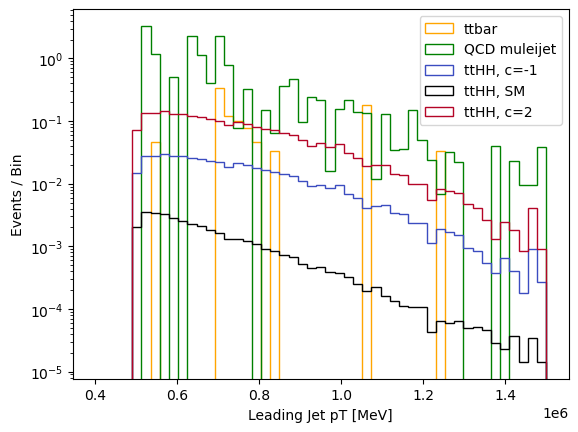

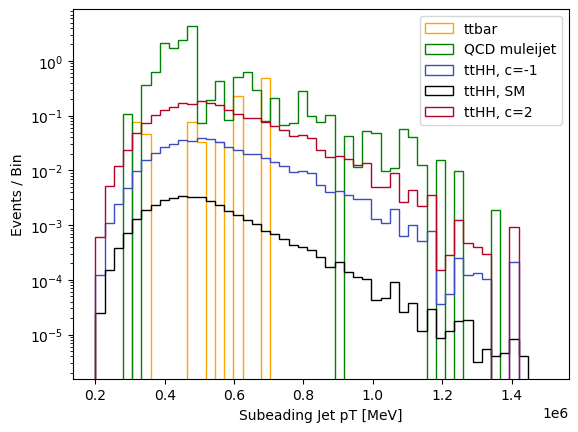

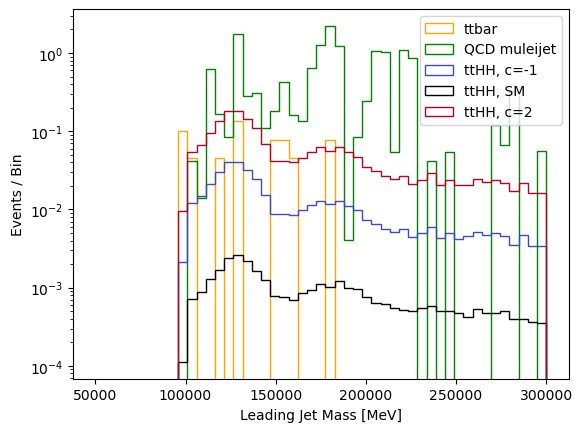

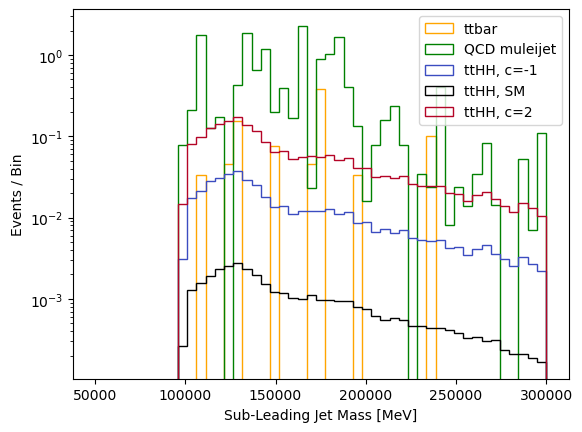

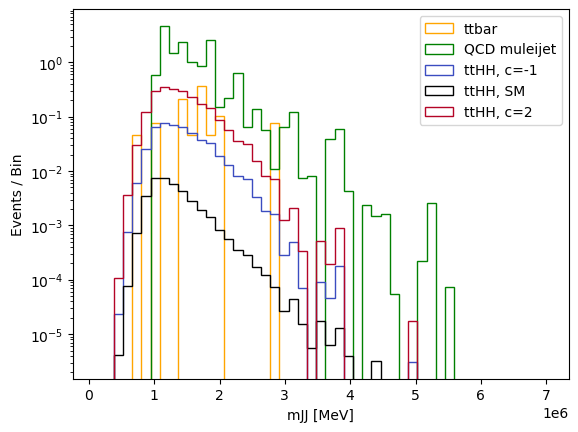

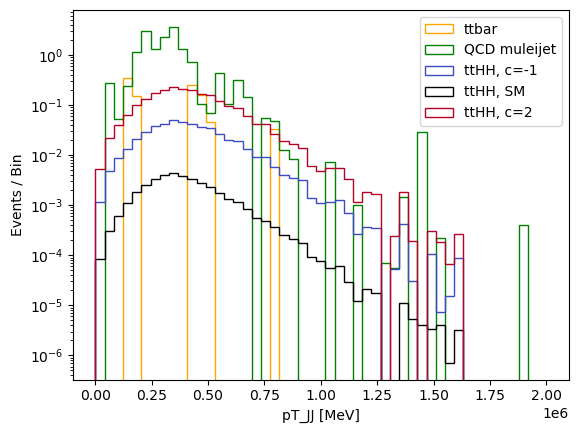

In [57]:
### plot some useful variables, now with another basic selection

vars = { 
    'ttHH_LargeRJet1_pt_NOSYS':{ 
        'bins':np.linspace(400000,1500000,50) , 
        'xlabel':'Leading Jet pT [MeV]' } ,
    'ttHH_LargeRJet2_pt_NOSYS':{ 
        'bins':np.linspace(200000,1500000,50) , 
        'xlabel':'Subeading Jet pT [MeV]' } ,
    'ttHH_LargeRJet1_mass_NOSYS':{
        'bins':np.linspace(50000,300000,50) , 
        'xlabel':'Leading Jet Mass [MeV]' } ,   
    'ttHH_LargeRJet2_mass_NOSYS':{
        'bins':np.linspace(50000,300000,50) , 
        'xlabel':'Sub-Leading Jet Mass [MeV]' } ,       
    'mHH':{
        'bins':np.linspace(100000,7000000,50) , 
        'xlabel':'mJJ [MeV]' } ,   
    'pT_HH':{
        'bins':np.linspace(0,2000000,50) , 
        'xlabel':'pT_JJ [MeV]' } ,   
}


for var in vars.keys(): 
    bins = vars[var]['bins']
    
    fig,ax = plt.subplots()
    for samp in inputs.keys(): 

        msel = get_sel(indfs[samp],'0p25')
        
        if( samp=='ttHH' ): continue
        ax.hist( 
            indfs[samp][msel][var] , 
            bins=bins, 
            weights=indfs[samp][msel]['mc_sf'] , 
            label=samp , 
            color=colors[samp],
            histtype='step' , 
            density=False )
    
    for eftw in [-1,0,2]:
        wstr = getEFTweightstring(eftw)
        samp = 'ttHH'
        msel = get_sel(indfs[samp], '0p25')
        
        if (eftw!=0):
            plt.hist( indfs['ttHH'][msel][var] , 
                         weights= ( indfs['ttHH'][msel][f'ttHH_eft_weight_heft_shape_CttHH_{wstr}_NOSYS'] * 
                                   indfs['ttHH'][msel][f'ttHH_eft_weight_heft_norm_CttHH_{wstr}_NOSYS'] * 
                                   indfs['ttHH'][msel][f'mc_sf'] ) , 
                         histtype='step', density=False,
                         color=colormaps['coolwarm'](cnorm_narrow(eftw)), #alpha=0.5, 
                         bins=bins, label=f'ttHH, c={eftw}')
        else: 
            plt.hist( indfs['ttHH'][msel][var] , 
                         weights= indfs['ttHH'][msel][f'mc_sf'] , 
                         histtype='step', density=False,
                         color='k', #alpha=0.5, 
                         bins=bins, label=f'ttHH, SM')
    
    
    ax.set_yscale('log')
    ax.legend()
    ax.set_xlabel(vars[var]['xlabel'])
    ax.set_ylabel('Events / Bin')

    

In [58]:
### Check yields 

bkg_yield = 0.
sig_yield_ctth1 = 0.

print(f'GN2Xv01 WP = {xbbwp}')
for samp in inputs.keys(): 

    if( 'ttHH' in samp ): continue

    msel = get_sel( indfs[samp], xbbwp )

    winit = indfs[samp]['mc_sf'].sum()
    wpost = indfs[samp][msel]['mc_sf'].sum()
    bkg_yield += wpost

    print(f'=== {samp} ===')
    print(f'  Init. Sum Weights = {winit}')
    print(f'  Sum Weights After Cut = {wpost}')
    print(f'  Eff. = {wpost/winit}')

for eftw in [-1,0,0.5,1,2]:
    samp = 'ttHH'
    msel = get_sel( indfs[samp] , xbbwp )

    if( eftw != 0 ):
        samp = f'ttHH, cttHH={eftw}'
        wstr = getEFTweightstring(eftw)

        winit = ( indfs['ttHH'][f'ttHH_eft_weight_heft_shape_CttHH_{wstr}_NOSYS'] * 
                                   indfs['ttHH'][f'ttHH_eft_weight_heft_norm_CttHH_{wstr}_NOSYS'] * 
                                   indfs['ttHH'][f'mc_sf'] ).sum()
        wpost = ( indfs['ttHH'][msel][f'ttHH_eft_weight_heft_shape_CttHH_{wstr}_NOSYS'] * 
                                   indfs['ttHH'][msel][f'ttHH_eft_weight_heft_norm_CttHH_{wstr}_NOSYS'] * 
                                   indfs['ttHH'][msel][f'mc_sf'] ).sum()

        if( eftw==1 ): sig_yield_ctth1 += wpost
        
    else: 
        samp = f'ttHH, SM'
        winit = indfs['ttHH']['mc_sf'].sum()
        wpost = indfs['ttHH'][msel]['mc_sf'].sum()   
        

    print(f'=== {samp} ===')
    print(f'  Init. Sum Weights = {winit}')
    print(f'  Sum Weights After Cut = {wpost}')
    print(f'  Eff. = {wpost/winit}')
    print(f'  S/RootB (cttHH={eftw}) = {wpost/np.sqrt(bkg_yield)}')


GN2Xv01 WP = 0p25
=== ttbar ===
  Init. Sum Weights = 60179.03020467676
  Sum Weights After Cut = 0.9775729158554224
  Eff. = 1.6244411259712377e-05
=== QCD muleijet ===
  Init. Sum Weights = 4211988.616046984
  Sum Weights After Cut = 15.214874702658555
  Eff. = 3.6122782109838534e-06
=== ttHH, cttHH=-1 ===
  Init. Sum Weights = 11.178334418378782
  Sum Weights After Cut = 0.4846759990423074
  Eff. = 0.04335851665391498
  S/RootB (cttHH=-1) = 0.12044679930673852
=== ttHH, SM ===
  Init. Sum Weights = 1.5559074921977083
  Sum Weights After Cut = 0.0380786983298172
  Eff. = 0.02447362617685664
  S/RootB (cttHH=0) = 0.00946293471237675
=== ttHH, cttHH=0.5 ===
  Init. Sum Weights = 5.934795811406505
  Sum Weights After Cut = 0.20246692192672555
  Eff. = 0.034115229632263
  S/RootB (cttHH=0.5) = 0.050315040892777343
=== ttHH, cttHH=1 ===
  Init. Sum Weights = 16.456217814425205
  Sum Weights After Cut = 0.6234161499264612
  Eff. = 0.03788331905645941
  S/RootB (cttHH=1) = 0.154925104694977

Plotting: ttbar
Plotting: QCD muleijet
Plotting: ttHH, cttHH=-1
Plotting: ttHH, SM
Plotting: ttHH, cttHH=1
Plotting: ttHH, cttHH=2


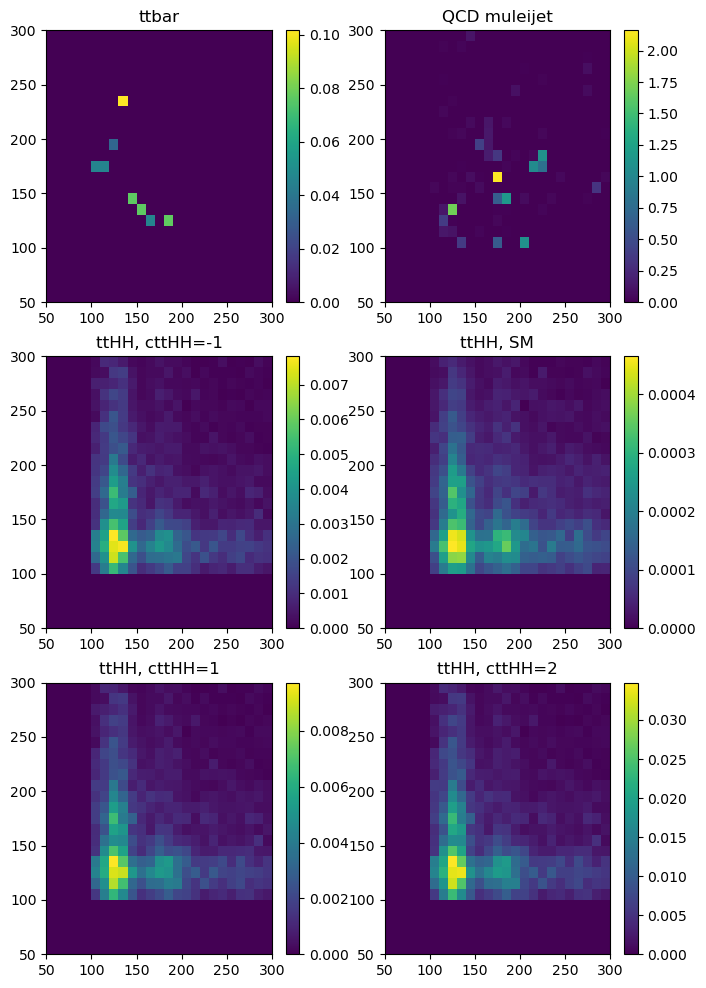

In [59]:
bins = np.linspace(50,300,26)

ncol = 2 
nrow = 3 
fig,ax = plt.subplots(nrow,ncol,figsize=(8,12))
irow = 0 
icol = 0 

for samp in inputs.keys(): 
    if( 'ttHH' in samp ): continue

    print(f'Plotting: {samp}')

    msel = get_sel( indfs[samp] , xbbwp)
    
    counts, xedges, yedges, im = ax[irow,icol].hist2d( 
        indfs[samp][msel]['ttHH_LargeRJet1_mass_NOSYS']/GeV , 
        indfs[samp][msel]['ttHH_LargeRJet2_mass_NOSYS']/GeV , 
        bins=bins,
        weights=indfs[samp][msel]['mc_sf'],
        label=samp,
        #vmax=5
    )

    ax[irow,icol].set_title(samp)
    fig.colorbar(im, ax=ax[irow,icol])
    
    icol+=1
    if( icol==ncol ): 
        irow+=1 
        icol=0


for eftw in [-1,0,1,2]:
    samp = 'ttHH'
    msel = get_sel( indfs[samp] , xbbwp)

    if( eftw != 0 ):
        samp = f'ttHH, cttHH={eftw}'
        wstr = getEFTweightstring(eftw)
        weights = indfs['ttHH'][msel][f'ttHH_eft_weight_heft_shape_CttHH_{wstr}_NOSYS'] * \
                           indfs['ttHH'][msel][f'ttHH_eft_weight_heft_norm_CttHH_{wstr}_NOSYS'] * \
                           indfs['ttHH'][msel][f'mc_sf']
    else: 
        samp = f'ttHH, SM'
        weights = indfs['ttHH'][msel][f'mc_sf'] 

    print(f'Plotting: {samp}')

    counts, xedges, yedges, im = ax[irow,icol].hist2d( 
        indfs['ttHH'][msel]['ttHH_LargeRJet1_mass_NOSYS']/GeV , 
        indfs['ttHH'][msel]['ttHH_LargeRJet2_mass_NOSYS']/GeV , 
        bins=bins,
        weights=weights,
        label=samp,
        #vmax=5
    )
    ax[irow,icol].set_title(samp)
    fig.colorbar(im, ax=ax[irow,icol])

    icol+=1
    if( icol==ncol ): 
        irow+=1 
        icol=0
        

In [ ]:
# bins = np.linspace(50,300,26)

# ncol = 2 
# nrow = 3 
# fig,ax = plt.subplots(nrow,ncol,figsize=(8,12))
# irow = 0 
# icol = 0 

# for samp in inputs.keys(): 
#     if( 'ttHH' in samp ): continue

#     print(f'Plotting: {samp}')

#     msel = get_sel( indfs[samp] , xbbwp )
#     ih1 = indfs[samp][msel]['idx_h1'].to_numpy()
#     ih2 = indfs[samp][msel]['idx_h2'].to_numpy()
    
#     counts, xedges, yedges, im = ax[irow,icol].hist2d( 
#         indfs[samp][msel][f'ttHH_LargeRJet{ih1}_mass_NOSYS']/GeV , 
#         indfs[samp][msel][f'ttHH_LargeRJet{ih2}_mass_NOSYS']/GeV , 
#         bins=bins,
#         weights=indfs[samp][msel]['mc_sf'],
#         label=samp,
#         #vmax=5
#     )

#     ax[irow,icol].set_title(samp)
#     fig.colorbar(im, ax=ax[irow,icol])
    
#     icol+=1
#     if( icol==ncol ): 
#         irow+=1 
#         icol=0


# for eftw in [-1,0,1,2]:
#     samp = 'ttHH'
#     msel = get_sel( indfs[samp] , xbbwp )

#     if( eftw != 0 ):
#         samp = f'ttHH, cttHH={eftw}'
#         wstr = getEFTweightstring(eftw)
#         weights = indfs['ttHH'][msel][f'ttHH_eft_weight_heft_shape_CttHH_{wstr}_NOSYS'] * \
#                            indfs['ttHH'][msel][f'ttHH_eft_weight_heft_norm_CttHH_{wstr}_NOSYS'] * \
#                            indfs['ttHH'][msel][f'mc_sf']
#     else: 
#         samp = f'ttHH, SM'
#         weights = indfs['ttHH'][msel][f'mc_sf'] 

#     print(f'Plotting: {samp}')
#     ih1 = indfs['ttHH'][msel]['idx_h1'].to_numpy()
#     ih2 = indfs['ttHH'][msel]['idx_h2'].to_numpy()

#     counts, xedges, yedges, im = ax[irow,icol].hist2d( 
#         indfs['ttHH'][msel][f'ttHH_LargeRJet{ih1}_mass_NOSYS']/GeV , 
#         indfs['ttHH'][msel][f'ttHH_LargeRJet{ih1}_mass_NOSYS']/GeV , 
#         bins=bins,
#         weights=weights,
#         label=samp,
#         #vmax=5
#     )
#     ax[irow,icol].set_title(samp)
#     fig.colorbar(im, ax=ax[irow,icol])

#     icol+=1
#     if( icol==ncol ): 
#         irow+=1 
#         icol=0
        

Text(0.5, 1.0, 'R22v1 Truth Label of Large-R Jets, Normalized')

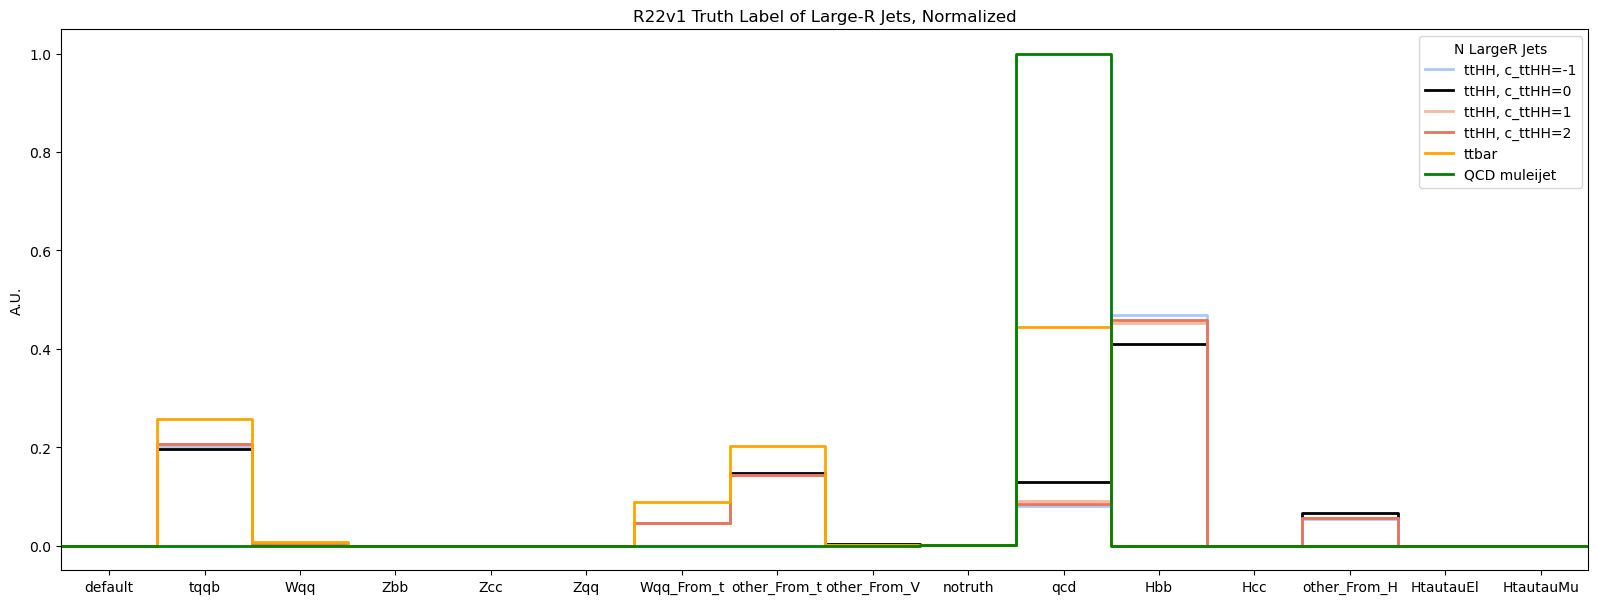

In [60]:
label_dict = {
    0: 'default',
    1: 'tqqb',
    2: 'Wqq',
    3: 'Zbb',
    4: 'Zcc',
    5: 'Zqq',
    6: 'Wqq_From_t',
    7: 'other_From_t',
    8: 'other_From_V',
    9: 'notruth',
    10: 'qcd',
    11: 'Hbb',
    12: 'Hcc',
    13: 'other_From_H',
    14: 'HtautauEl',
    15: 'HtautauMu',
    16: 'HtautauHad',
}

def getbinlabels(bin): 
    if bin in label_dict.keys(): 
        return label_dict[bin]
    else: 
        return ' '


fig, ax = plt.subplots(figsize=(16,6))
fig.tight_layout()

bins = np.linspace(0,16,17)

# colors for different cttHH 
cnorm = mpl.colors.Normalize(vmin=-3, vmax=3)

eftcolors = {} 
for eftw in [-1,0,1,2]: 
    eftcolors[eftw] = colormaps['coolwarm'](cnorm(eftw)) if (eftw!=0) else 'k'


for samp in inputs.keys(): 

    if( 'ttHH' in samp ): 

        for eftw in [-1,0,1,2]:
            all_labels = np.zeros(16)
        
            wstr = getEFTweightstring(eftw)
            if( eftw == 0 ): 
                wgts = indfs[samp][f'mc_sf']
            else: 
                wgts = indfs['ttHH'][f'ttHH_eft_weight_heft_shape_CttHH_{wstr}_NOSYS'] * \
                                   indfs['ttHH'][f'ttHH_eft_weight_heft_norm_CttHH_{wstr}_NOSYS'] * \
                                   indfs['ttHH'][f'mc_sf']
    
            for ijet in range(1,7): 
                all_labels += np.histogram( indfs[samp][f"ttHH_LargeRJet{ijet}_truthlabel_v22_NOSYS"] , 
                                           bins=bins, 
                                           weights=wgts )[0]

            all_labels /= np.sum( all_labels )
            all_labels = np.append( all_labels , all_labels[-1] )
            ax.step( bins , all_labels , where='post' , label=f'ttHH, c_ttHH={eftw}' , linewidth=2 , color=eftcolors[eftw] )

    else: 
        
        all_labels = np.zeros(16)
        
        wgts = indfs[samp][f'mc_sf']
        
        for ijet in range(1,7): 
            all_labels += np.histogram( indfs[samp][f"ttHH_LargeRJet{ijet}_truthlabel_v22_NOSYS"] , 
                                       bins=bins, 
                                       weights=wgts )[0]

        all_labels /= np.sum( all_labels )
        all_labels = np.append( all_labels , all_labels[-1] )
        ax.step( bins , all_labels , where='post' , label=samp , linewidth=2 , color=colors[samp] )                                   
    

#out["MGPy8EG_A14NNPDF23LO_ttHH_fullhad__Nominal"]["lrjtruthlabel"].plot1d(ax=ax,alpha=0.5,color=eftcolors, density=True)
#out["PhPy8EG_A14_ttbar_hdamp258p75_allhad__Nominal"]["lrjtruthlabel"].plot1d(ax=ax,alpha=0.5,color='green',linewidth=2,density=True)
#out["PhPy8EG_A14_ttbar_hdamp258p75_allhad__Nominal"]["nlrjet"].plot1d(ax=ax,alpha=0.5,color='green',linewidth=2,density=True)
ax.set_xlim([0,16])
ax.xaxis.set_ticks([ i+0.5 for i in range(16) ])
a=ax.get_xticks().tolist()
# ax.set_xticklabels([label_dict[i] for i in a])
ax.set_xticklabels([getbinlabels(i-0.5) for i in a])
ax.legend(title="N LargeR Jets")
ax.set_ylabel('A.U.')
ax.set_title('R22v1 Truth Label of Large-R Jets, Normalized')


In [61]:
#np.histogram( indfs[samp][f"ttHH_LargeRJet{ijet}_truthlabel_v22_NOSYS"] , bins=bins, weights=wgts )[0].shape , all_labels.shape
all_labels.shape , bins.shape

((17,), (17,))

In [44]:
pip install cabinetry


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [45]:
pip install hist

  Using cached hist-2.9.0-py3-none-any.whl.metadata (15 kB)
  Using cached histoprint-2.6.0-py3-none-any.whl.metadata (17 kB)
  Using cached uhi-1.0.0-py3-none-any.whl.metadata (5.7 kB)
Using cached hist-2.9.0-py3-none-any.whl (42 kB)
Using cached histoprint-2.6.0-py3-none-any.whl (16 kB)
Using cached uhi-1.0.0-py3-none-any.whl (25 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 3/3 [hist]

[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [47]:
pip install uproot


[notice] A new release of pip is available: 25.1.1 -> 25.3
[notice] To update, run: pip install --upgrade pip
Note: you may need to restart the kernel to use updated packages.


In [48]:
import pyhf
import cabinetry
import hist
import uproot

In [54]:
### Create input histograms (c=0)
nbins = 21
bkg = np.zeros(nbins-1)
sumwgts = np.zeros(nbins-1)

voi = 'pT_HH'

with uproot.recreate("ttHH_ana_inputs.root") as f:
    #data = hist.Hist(hist.axis.Regular(nbins, 0, 2000, name=voi))
    for samp in inputs.keys(): 

        msel = get_sel( indfs[samp] , xbbwp )
        
        wgts = indfs[samp][msel][f'mc_sf']

        axis = hist.axis.Regular(nbins, 0, 2000, name=voi)
        h = hist.Hist(axis, storage=hist.storage.Weight())
        h.fill(indfs[samp][msel][voi]/1000., weight=wgts)
        f[f"SR/{samp}"] = h
        #if 'ttHH' not in samp: data += h
        if 'QCD' in samp: f["SR/data"] = h

In [59]:
#### Create workspace with cabinetry
cabinetry_config = cabinetry.configuration.load("ttHH_config.yaml")
cabinetry.templates.collect(cabinetry_config, method="uproot")
cabinetry.templates.postprocess(cabinetry_config)
ws = cabinetry.workspace.build(cabinetry_config)
cabinetry.workspace.save(ws,"ttHH_cabinetry_workspace.json")

variation override specified, but {VariationPath} not found in default path
SR_data has empty bins: [10 11 14 16 17 18 20]
variation override specified, but {VariationPath} not found in default path
SR_QCD has empty bins: [10 11 14 16 17 18 20]
variation override specified, but {VariationPath} not found in default path
SR_ttHH has empty bins: [18 19 20]
SR_data has empty bins: [10 11 14 16 17 18 20]
SR_QCD has empty bins: [10 11 14 16 17 18 20]
SR_ttHH has empty bins: [18 19 20]


predicted yield is zero in 2 bin(s), excluded from ratio plot
/base/lib/python3.12/site-packages/cabinetry/visualize/plot_model.py:168: RuntimeWarning: invalid value encountered in divide
  rel_mc_unc = total_model_unc / total_yield
/base/lib/python3.12/site-packages/cabinetry/visualize/plot_model.py:182: RuntimeWarning: invalid value encountered in divide
  data_model_ratio = data_histogram_yields / total_yield
/base/lib/python3.12/site-packages/cabinetry/visualize/plot_model.py:183: RuntimeWarning: invalid value encountered in divide
  data_model_ratio_unc = data_histogram_stdev / total_yield


W VariableMetricBuilder No improvement in line search
W VariableMetricBuilder No improvement in line search
W VariableMetricBuilder No improvement in line search
W VariableMetricBuilder No improvement in line search
W VariableMetricBuilder No improvement in line search
W VariableMetricBuilder No improvement in line search
W VariableMetricBuilder No improvement in line search
W VariableMetricBuilder No improvement in line search
W VariableMetricBuilder No improvement in line search
W VariableMetricBuilder No improvement in line search
W VariableMetricBuilder No improvement in line search
W VariableMetricBuilder No improvement in line search
W VariableMetricBuilder No improvement in line search
W VariableMetricBuilder No improvement in line search
W VariableMetricBuilder No improvement in line search
W VariableMetricBuilder No improvement in line search
W VariableMetricBuilder No improvement in line search
W VariableMetricBuilder No improvement in line search
W VariableMetricBuilder No i

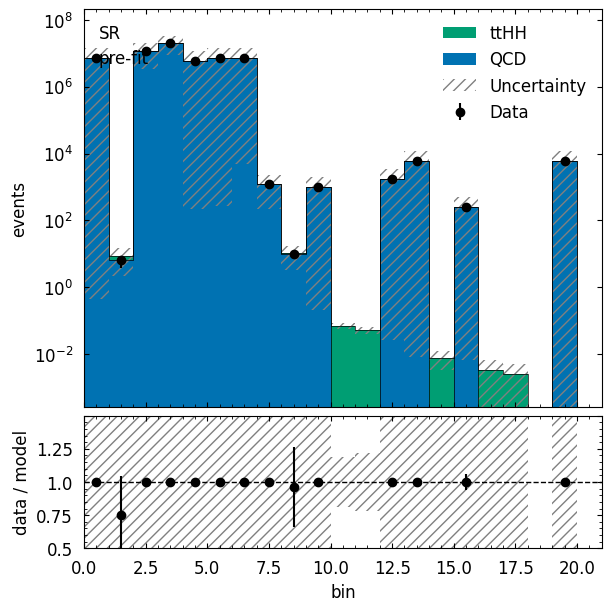

In [62]:
#### Use cabinetry to get upper limits
model, data = cabinetry.model_utils.model_and_data(ws)
model_pred = cabinetry.model_utils.prediction(model)
cabinetry.visualize.data_mc(
    model_pred, data, config=cabinetry_config, figure_folder="results/templates/"
)
limit_results = cabinetry.fit.limit(model, data)
cabinetry.visualize.limit(
    limit_results,
    figure_folder=os.path.join("results", "ttHH_limit"),
)
print(
    "cabinetry got the following limits [-2s, -1s, upper_limit, +1s, +2s]: ",
    limit_results.expected_limit,
)

In [63]:
# ws = {'channels':[],"version":"1.0.0"} 

# for samp in inputs.keys(): 

#     msel = get_sel( indfs[samp] , xbbwp )
    
#     data = np.histogram( 
#         indfs[samp][msel][f'ttHH_LargeRJet1_mass_NOSYS']/GeV , 
#         bins=np.linspace(50,200,25), 
#         weights = indfs[samp][msel][f'mc_sf'] )[0].tolist()

#     if( samp=='ttHH' ): 
#         modifiers = [{ 
#             'name': 'mu' , 
#             'type': 'normfactor',
#             'data': [], 
#         }]
#     else: 
#         modifiers=[] 
    
#     ws['channels'].append( {
#         'name':samp, 
#         'data':data,
#         'modifiers': modifiers,
#     } )

# ws

In [64]:
#ws = pyhf.workspace.Workspace(ws)

In [65]:
# {
#   "channels": [
#     {
#       "name": "singlechannel",
#       "samples": [
#         {
#           "name": "ttHH_signal",
#           "data": [
#             5.0,
#             10.0
#           ],
#           "modifiers": [
#             {
#               "name": "mu",
#               "type": "normfactor",
#               "data": null
#             }
#           ]
#         },
#         {
#           "name": "background",
#           "data": [
#             50.0,
#             60.0
#           ],
#           "modifiers": [
#             {
#               "name": "uncorr_bkguncrt",
#               "type": "shapesys",
#               "data": [
#                 5.0,
#                 12.0
#               ]
#             }
#           ]
#         }
#       ]
#     }
#   ]
# }

In [35]:
# Get bkg, since it's always the same for any sig model 

nbins = 21
bins = np.linspace(0,2000,nbins)
bkg = np.zeros(nbins-1)
sumwgts = np.zeros(nbins-1)

voi = 'pT_HH'

for samp in inputs.keys(): 
    if( 'ttHH' in samp ): continue 

    msel = get_sel( indfs[samp] , xbbwp )
        
    wgts = indfs[samp][msel][f'mc_sf']
    data = np.histogram( 
        indfs[samp][msel][voi]/GeV ,  
        bins=bins, 
        weights = wgts )[0]

    bin_id = np.digitize(indfs[samp][msel][voi]/GeV,bins)-1 
    vals = np.histogram(indfs[samp][msel][voi]/GeV,bins=bins,weights=wgts)

    bkg += data
    sumwgts += np.array( [ np.sum( wgts[ (bin_id==ibin) ] ) for ibin in range(len(bins)-1) ] )
    sumwgts = np.sqrt(sumwgts)


In [40]:
print(bkg)
print(sumwgts)

[7.26345591e+06 6.36162349e+00 1.20069182e+07 2.07525748e+07
 6.00302820e+06 7.26372826e+06 7.26937764e+06 2.55598563e+02
 1.01837991e+03 0.00000000e+00 0.00000000e+00 1.76928993e+03
 0.00000000e+00 6.12085398e+03 2.50587439e+02 0.00000000e+00
 0.00000000e+00 0.00000000e+00 6.12085398e+03 0.00000000e+00]
[2.69507995e+03 2.52222590e+00 3.46510003e+03 4.55549940e+03
 2.45010779e+03 2.69513047e+03 2.69617834e+03 1.59874502e+01
 3.19120653e+01 0.00000000e+00 0.00000000e+00 4.20629282e+01
 0.00000000e+00 7.82358868e+01 1.58299539e+01 0.00000000e+00
 0.00000000e+00 0.00000000e+00 7.82358868e+01 0.00000000e+00]


In [67]:
# Get the limits for different HEFT c_ttHH scenarios 

from scipy.optimize import root_scalar

def find_upper_lim( x , data , model ): 

    par_bounds = model.config.suggested_bounds() 
    par_bounds[model.config.poi_index] = [0, 100]
    
    CLs_obs, CLs_exp = pyhf.infer.hypotest(
        x, data, model, test_stat="qtilde", return_expected=True, par_bounds=par_bounds, 
    )
    print(f"Observed: {CLs_obs}, Expected: {CLs_exp}")
    #return 0.05 - CLs_exp   # find crossing point of CLs at 0.05 
    return 0.32 - CLs_exp   # find crossing point of CLs at 0.05 


upper_lims = []

#for eftw in np.linspace(-3,3,13): 
for eftw in np.linspace(-2,2,9): 
    
    # if( eftw <= -3 ): factor = 0.5
    # elif( eftw <= -2 ): factor = 1.
    # elif( eftw <= -1.5 ): factor = 2.
    # elif( eftw <= -1 ): factor = 4.
    # elif( eftw <= -0.5 ): factor = 20.
    # elif( eftw == 0 ): factor = 60.
    # elif( eftw <= 0.5 ): factor = 7.5
    # elif( eftw <= 1. ): factor = 4.
    # elif( eftw <= 1.5 ): factor = 2.
    # elif( eftw <= 2. ): factor = 1.
    # elif( eftw <= 3. ): factor = 0.5

    # fit mH1, with masscut 
    # if( eftw <= -3 ): 
    #     factor = 0.3
    #     x0 = 1
    # elif( eftw <= -1 ): 
    #     factor = 1
    #     x0 = 3
    # # elif( eftw <= -1 ): 
    # #     factor = 1
    # #     x0 = 10    
    # elif( eftw < 0 ): 
    #     factor = 1
    #     x0 = 30 
    # elif( eftw == 0 ): 
    #     factor = 6
    #     x0 = 50
    # elif( eftw <= 1 ): 
    #     factor = 0.75
    #     x0 = 20
    # elif( eftw <= 2 ): 
    #     factor = 1
    #     x0 = 3
    # elif( eftw <= 3 ): 
    #     factor = 0.1
    #     x0 = 1

    # # For pT_JJ
    # if( eftw <= -3 ): 
    #     factor = 1
    #     x0 = 1
    # elif( eftw <= -2 ): 
    #     factor = 1
    #     x0 = 3
    # elif( eftw <= -1.5 ): 
    #     factor = 1
    #     x0 = 5
    # elif( eftw <= -1 ): 
    #     factor = 1
    #     x0 = 18
    # elif( eftw < 0 ): 
    #     factor = 1
    #     x0 = 60 
    # elif( eftw == 0 ): 
    #     factor = 10
    #     x0 = 25
    # elif( eftw <= 0.5 ): 
    #     factor = 2
    #     x0 = 15
    # elif( eftw <= 1 ): 
    #     factor = 1
    #     x0 = 20
    # elif( eftw <= 2 ): 
    #     factor = 1
    #     x0 = 3
    # elif( eftw <= 3 ): 
    #     factor = 1
    #     x0 = 1

    # For pT_JJ
    if( eftw <= -1.5 ): 
        factor = 1
        x0 = 2
    elif( eftw <= -1 ): 
        factor = 1
        x0 = 3
    elif( eftw < 0 ): 
        factor = 1
        x0 = 12
    elif( eftw == 0 ): 
        factor = 10
        x0 = 25
    elif( eftw <= 0.5 ): 
        factor = 2
        x0 = 5
    elif( eftw <= 1 ): 
        factor = 1
        x0 = 1




    # get the sig data for this model 
    sig = np.zeros(nbins-1)

    msel = get_sel( indfs['ttHH'] , xbbwp )
    
    wstr = getEFTweightstring(eftw)
    if( eftw != 0 ):
        wgts = factor*indfs['ttHH'][msel][f'ttHH_eft_weight_heft_shape_CttHH_{wstr}_NOSYS'] * \
                           indfs['ttHH'][msel][f'ttHH_eft_weight_heft_norm_CttHH_{wstr}_NOSYS'] * \
                           indfs['ttHH'][msel][f'mc_sf']
    else: wgts = factor*indfs['ttHH'][msel][f'mc_sf']
    
    sig = np.histogram( 
        indfs['ttHH'][msel][voi]/GeV , 
        bins=bins, 
        weights = wgts )[0]

    # make the model 
    model = pyhf.simplemodels.uncorrelated_background(
        signal=sig, bkg=bkg, bkg_uncertainty=sumwgts
    )
    bounds = model.config.suggested_bounds()
    bounds[model.config.poi_index] = [0, 100]
    
    data = np.append(bkg , model.config.auxdata)

    print(eftw, factor)

    upper_lim = root_scalar( find_upper_lim , x0=x0 , args=(data , model) , xtol=0.0001 ).root
    print( f"For c_ttHH = {eftw}, found upper lim on xsec at mu = {upper_lim*factor}" )
    upper_lims.append( upper_lim*factor )


-2.0 1
Observed: 0.34458186687837145, Expected: 0.34458186687837145
Observed: 0.34458186687837145, Expected: 0.34458186687837145
Observed: 0.34458166911687593, Expected: 0.34458166911687593
Observed: 0.3437774702504526, Expected: 0.3437774702504526
Observed: 0.3437774702504526, Expected: 0.3437774702504526
Observed: 0.3437774638836093, Expected: 0.3437774638836093
Observed: 0.32021533552592407, Expected: 0.32021533552592407
Observed: 0.32021533552592407, Expected: 0.32021533552592407
Observed: 0.32021532483102644, Expected: 0.32021532483102644
Observed: 0.32008481685024825, Expected: 0.32008481685024825
Observed: 0.32008481685024825, Expected: 0.32008481685024825
Observed: 0.32008481129532007, Expected: 0.32008481129532007
Observed: 0.3199858289799309, Expected: 0.3199858289799309
Observed: 0.3199858289799309, Expected: 0.3199858289799309
Observed: 0.31998582505833395, Expected: 0.31998582505833395
Observed: 0.3200092577011995, Expected: 0.3200092577011995
Observed: 0.3200092577011995,

ValueError: fit initialization parameter (index: 0, value: -30.488521119974813) lies outside of its bounds: [0, 100]
To correct this adjust the initialization parameter values in the model spec or those given
as arguments to pyhf.infer.fit. If this value is intended, adjust the range of the parameter
bounds.

ValueError: x and y must have same first dimension, but have shapes (13,) and (1,)

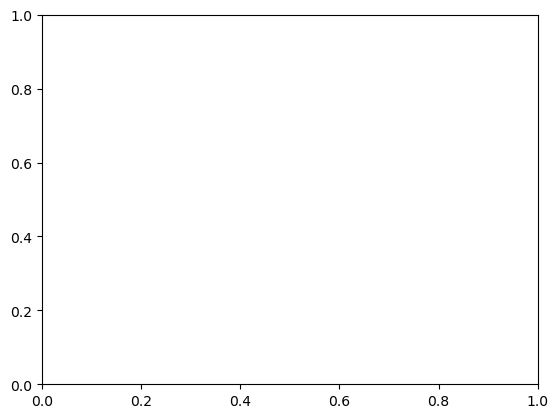

In [69]:
#sig.sum() , bkg.sum() , sig , bkg , sumwgts

plt.plot( np.linspace(-3,3,13) , upper_lims )
plt.xlabel( 'c_ttHH' )
plt.ylabel( 'Upper lim. on mu (CLs 0.05)' )
plt.yscale('log')

In [68]:
upper_lims

[np.float64(2.1162814154262244)]